In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,roc_curve,auc
from sklearn.metrics import confusion_matrix,classification_report

import warnings 
warnings.filterwarnings('ignore')

In [51]:
df_raw = pd.read_csv('./실습화일/2. Big Data 분석/HMEQ.csv')
df_raw['JOB'].fillna('Other',inplace = True)
df_raw.fillna(df_raw.mean(),inplace = True)
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy

#설명,목표 변수 데이터 구분
df_x = df_raw_dummy.drop("BAD", axis = 1, inplace = False)
df_y = df_raw_dummy["BAD"]

#데이터 분할
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_x,df_y,test_size = 0.3,random_state=1234)
print("분할 전 설명변수 데이터:",df_x.shape)
print("분할 후 설명변수 데이터:Train",df_train_x.shape,"Test",df_test_x.shape)

분할 전 설명변수 데이터: (3748, 18)
분할 후 설명변수 데이터:Train (2623, 18) Test (1125, 18)


In [52]:
# 분석 모델 리스트
model = ['DecisionTree','RandomForest','GradientBoosting','NeuralNet']
# 정확도 저장
train_accuracy = []; test_accuracy = []
# auc score 저장
model_auc = []

# Precision, Recall score 저장
model_precision = []; model_recall = []
# f1 score 저장
model_f1_score = []

## DeicisionTree

In [53]:
#모델 생성
dt_model = DecisionTreeClassifier(max_depth = 6, min_samples_split = 20, min_samples_leaf = 10, random_state = 1234)
dt_model.fit(df_train_x,df_train_y)

#train 정확도
train_accuracy.append(dt_model.score(df_train_x,df_train_y))
#test 정확도
test_accuracy.append(dt_model.score(df_test_x,df_test_y))

#예측값
y_pred = dt_model.predict(df_test_x)

print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,digits=3))

# fpr:거짓 양성비율, tpr:진짜 양성비율 (재현율)    =  roc_curve(실제값, 예측값)
fpr, tpr, thresholds = roc_curve(df_test_y,y_pred)
roc_auc = auc(fpr,tpr)

# auc 저장
model_auc.append(roc_auc)

Confusion matrix:
[[1013    8]
 [  74   30]]
              precision    recall  f1-score   support

           0      0.932     0.992     0.961      1021
           1      0.789     0.288     0.423       104

    accuracy                          0.927      1125
   macro avg      0.861     0.640     0.692      1125
weighted avg      0.919     0.927     0.911      1125



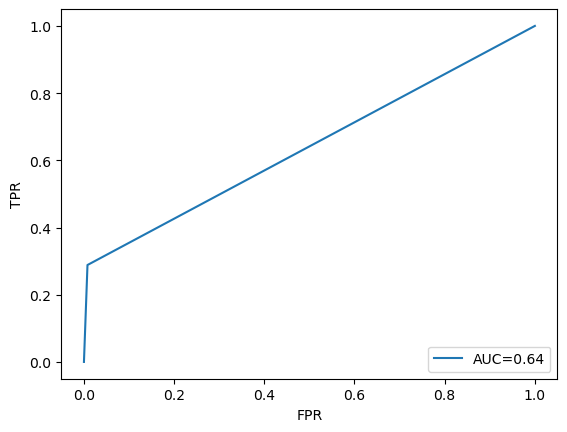

In [54]:
#roc curve 그리기
plt.plot(fpr,tpr,label="AUC=%0.2f"%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel("FPR")
plt.show()

In [55]:
# precision,recall, f1 score
model_precision.append(precision_score(df_test_y,y_pred))
model_recall.append(recall_score(df_test_y,y_pred))
model_f1_score.append(f1_score(df_test_y,y_pred))

# RandomForest

In [56]:
#모델 생성
rf_model = RandomForestClassifier( min_samples_leaf=20,max_depth=6, n_estimators = 100,random_state=1234)
rf_model.fit(df_train_x,df_train_y)

#train 정확도
train_accuracy.append(rf_model.score(df_train_x,df_train_y))
#test 정확도
test_accuracy.append(rf_model.score(df_test_x,df_test_y))

#예측값
y_pred = rf_model.predict(df_test_x)

print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,digits=3))

# fpr:거짓 양성비율, tpr:진짜 양성비율 (재현율)    =  roc_curve(실제값, 예측값)
fpr, tpr, thresholds = roc_curve(df_test_y,y_pred)
roc_auc = auc(fpr,tpr)

# auc 저장
model_auc.append(roc_auc)

Confusion matrix:
[[1021    0]
 [  84   20]]
              precision    recall  f1-score   support

           0      0.924     1.000     0.960      1021
           1      1.000     0.192     0.323       104

    accuracy                          0.925      1125
   macro avg      0.962     0.596     0.642      1125
weighted avg      0.931     0.925     0.902      1125



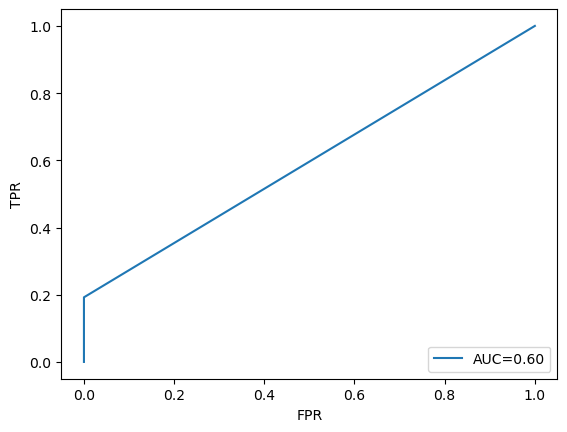

In [57]:
#roc curve 그리기
plt.plot(fpr,tpr,label="AUC=%0.2f"%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel("FPR")
plt.show()

In [58]:
# precision,recall, f1 score
model_precision.append(precision_score(df_test_y,y_pred))
model_recall.append(recall_score(df_test_y,y_pred))
model_f1_score.append(f1_score(df_test_y,y_pred))

## 그래디언트 부스팅

In [59]:
#모델 생성
gb_model = GradientBoostingClassifier(max_depth = 6, min_samples_leaf = 15,n_estimators = 100, learning_rate=0.1,random_state = 1234)
gb_model.fit(df_train_x,df_train_y)

#train 정확도
train_accuracy.append(gb_model.score(df_train_x,df_train_y))
#test 정확도
test_accuracy.append(gb_model.score(df_test_x,df_test_y))

#예측값
y_pred = gb_model.predict(df_test_x)

print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,digits=3))

# fpr:거짓 양성비율, tpr:진짜 양성비율 (재현율)    =  roc_curve(실제값, 예측값)
fpr, tpr, thresholds = roc_curve(df_test_y,y_pred)
roc_auc = auc(fpr,tpr)

# auc 저장
model_auc.append(roc_auc)

Confusion matrix:
[[1020    1]
 [  56   48]]
              precision    recall  f1-score   support

           0      0.948     0.999     0.973      1021
           1      0.980     0.462     0.627       104

    accuracy                          0.949      1125
   macro avg      0.964     0.730     0.800      1125
weighted avg      0.951     0.949     0.941      1125



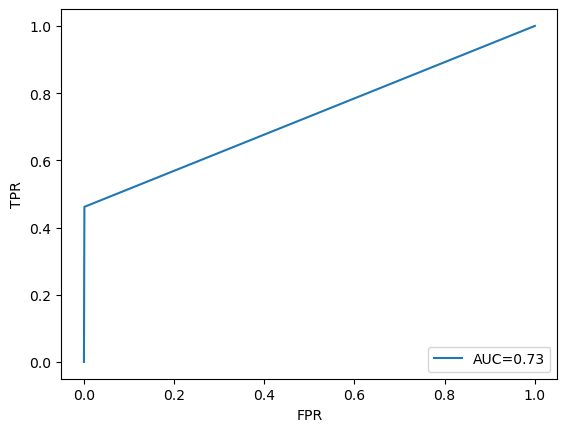

In [60]:
#roc curve 그리기
plt.plot(fpr,tpr,label="AUC=%0.2f"%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel("FPR")
plt.show()

In [61]:
# precision,recall, f1 score
model_precision.append(precision_score(df_test_y,y_pred))
model_recall.append(recall_score(df_test_y,y_pred))
model_f1_score.append(f1_score(df_test_y,y_pred))

## 인공 신경망 (트리계열 모델이 아니기 때문에 scaling 이 큰 영향을 미친다)

In [70]:
# data scaling
#변수명 저장
v_feature_names = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_names)

NameError: name 'df_raw_x' is not defined

In [69]:
#모델 생성
nn_model=MLPClassifier(hidden_layer_sizes=(80,80),activation="relu",solver="adam",random_state=1234)
nn_model.fit(df_train_x,df_train_y)

#train 정확도
train_accuracy.append(nn_model.score(df_train_x,df_train_y))
#test 정확도
test_accuracy.append(nn_model.score(df_test_x,df_test_y))

#예측값
y_pred = nn_model.predict(df_test_x)

print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,digits=3))

# fpr:거짓 양성비율, tpr:진짜 양성비율 (재현율)    =  roc_curve(실제값, 예측값)
fpr, tpr, thresholds = roc_curve(df_test_y,y_pred)
roc_auc = auc(fpr,tpr)

# auc 저장
model_auc.append(roc_auc)

Confusion matrix:
[[1021    0]
 [ 102    2]]
              precision    recall  f1-score   support

           0      0.909     1.000     0.952      1021
           1      1.000     0.019     0.038       104

    accuracy                          0.909      1125
   macro avg      0.955     0.510     0.495      1125
weighted avg      0.918     0.909     0.868      1125



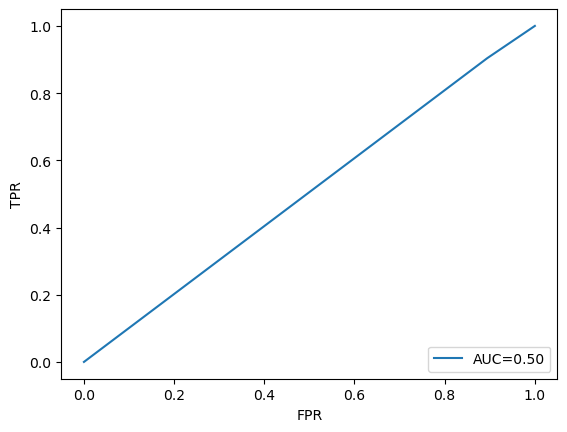

In [63]:
#roc curve 그리기
plt.plot(fpr,tpr,label="AUC=%0.2f"%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel("FPR")
plt.show()

In [64]:
# precision,recall, f1 score
model_precision.append(precision_score(df_test_y,y_pred))
model_recall.append(recall_score(df_test_y,y_pred))
model_f1_score.append(f1_score(df_test_y,y_pred))

In [65]:
print(train_accuracy)

[0.938238658025162, 0.9268013724742661, 0.9908501715592832, 0.17918414029736943]


In [67]:
df_eval = pd.DataFrame(index = model)
df_eval['TrainAccuracy'] = train_accuracy; df_eval['TestAccuracy'] = test_accuracy
df_eval['AUC'] = model_auc
df_eval['Precision'] = model_precision; df_eval['Recall']=model_recall
df_eval['F1Score'] = model_f1_score
df_eval.round(3)

,TrainAccuracy,TestAccuracy,AUC,Precision,Recall,F1Score
DecisionTree,0.938,0.927,0.640,0.789,0.288,0.423
RandomForest,0.927,0.925,0.596,1.000,0.192,0.323
GradientBoosting,0.991,0.949,0.730,0.980,0.462,0.627
NeuralNet,0.179,0.180,0.505,0.093,0.904,0.169


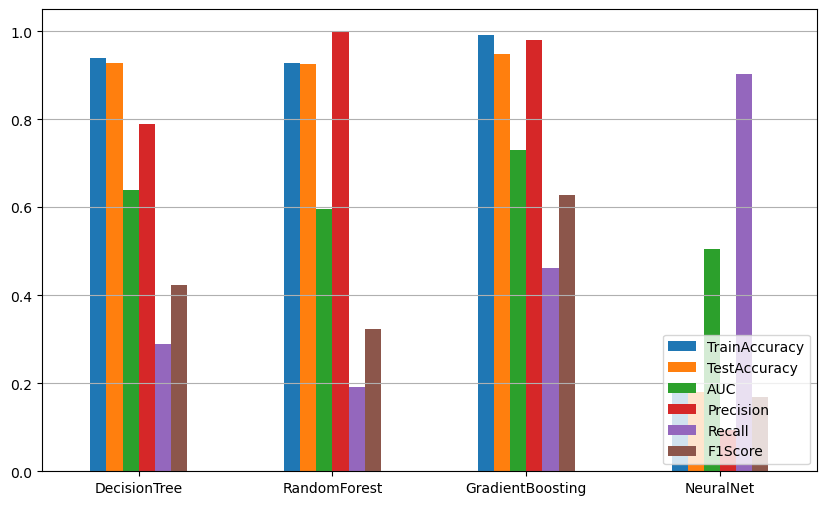

In [68]:
df_eval.plot.bar(rot=0, figsize=(10,6))
plt.legend(loc = 'lower right')
plt.grid(axis='y')